# TITLE: Building a Machine Learning Pipeline - Regression
## Author: Andrea Giussani


The aim of this lab is to challenge you on building a supervised machine learning pipeline to predict the future price of a stock. Here, you will be tested on your knowledge on data preprocessing, fitting and evaluation of a regression model. 

To get the most from this lab, it is recommended to have confidence and exposure to at least the following libraries: `pandas`, `matplotlib` and `scikit-learn`.
I strongly encourage you to have watched the following courses, available in our content library:
 - Building a Machine Learning pipeline with scikit-learn: part 01 <br>
 - Building a Machine Learning pipeline with scikit-learn: part 02 <br>

as well as the following lab:
 - Introduction to Financial Data Manipulation with Python <br>

before starting this challenge.

# 1. Data Preparation


In order to get the data in our working directory, we are going to use a very interesting library named `pandas_datareader`. This library is great if one wants to get financial and economical data to be ingested in a pandas dataframe. There are several possibilities for you. Among many, it is worth mentioning the

* Federal Reserve Economic Data (FRED);
* Eurostat;
* Organisation for Economic Co-operation and Development (OECD);
* World Bank.

The interesting fact is that you can even download data from either Yahoo or Google finance, and the nice thing is that those data are then stored into a pandas DataFrame automatically for you! My recommendation is that you should use this library if then you are going to use Pandas to perform further data wrangling and analysis on that dataset. 

In this lab we are going to focus on a particular function from the `pandas-datareader`: the `DataReader`. This belongs to the `data` submodule, and it imports data from a number of online sources, such as Google Finance, Yahoo Finance, and the St. Louis FED (FRED), among others.

For further information, please check the official documentation [here](https://pandas-datareader.readthedocs.io/en/latest/index.html).


We make the necessary import: this has been done for you in the following snippet

In [1]:
import pandas as pd
import pandas_datareader as pdr

Now, let us take into account the Amazon stock as our reference for this lab. I am going to define now a series of variables that we are going to use in order to get the data directly from yahoo finance, using the `data.DataReader` method. 

For example,

```python
STOCK_NAME = "AMZN"
DATA_SOURCE = "yahoo"
```
are defined already for you.

In [2]:
STOCK_NAME = "AMZN"
DATA_SOURCE = "yahoo"

#### Challenge N.1

Now, you are asked to set the `START_DATE` and the `END_DATE`. In particular, you are expected to get data related to the amazon stock from March 1st, 2011 to March 1st, 2021.

**Hint**: use the datetime function from the datetime library: just import `from datetime import datetime`, and then call the function appropriately. An example is as follows: `my_date = datetime(YYYY, MM, DD)`.

In [3]:
# Challenge
from datetime import datetime
START_DATE = datetime(2011, 3, 1) # this must be filled by student
END_DATE = datetime(2021, 3, 1) # this must be filled by student

Now we get the data using the `data.DaatReader` method: it requires four arguments:
 * `name`: a string containing the stock symbol - in our case "amzn";
 * `data_source`: a string denoting the online resource - in our case "yahoo";
 * `start`: a datetime object containing the lower bound of the desired time window - in our case "2011-03-01"; 
 * `end`: a datetime object containing the upper bound of the desired time window - in our case "2021-03-01".
 
We store this into the variable df, which is of type `pandas.DataFrame`. This has been done for you.

In [4]:
df = pdr.data.DataReader(
    name=STOCK_NAME, 
    data_source=DATA_SOURCE, 
    start=START_DATE, 
    end=END_DATE
)

We can inspect the last 5 rows of the above DataFrame using the pandas `tail` method.

In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-23,3204.729980,3093.600098,3127.030029,3194.500000,4677200,3194.500000
2021-02-24,3171.229980,3125.379883,3166.750000,3159.530029,3011300,3159.530029
2021-02-25,3178.260010,3047.760010,3136.739990,3057.159912,4533800,3057.159912
2021-02-26,3122.439941,3036.699951,3095.199951,3092.929932,4275900,3092.929932
2021-03-01,3149.560059,3097.989990,3127.889893,3146.139893,2729100,3146.139893


Just a brief description of the above columns: 
- **High**: stands for the maximum prices observed in a particular trading day.
* **Low**: stands for the minimum prices observed in a particular trading day.
* **Open**: stands for the opening prices observed in a particular trading day.
* **Close**: stands for the closing prices observed in a particular trading day.
* **Volume**: stands for the total volume observed in a particular trading day.
* **Adj Close**: stands for the adjusted closing prices observed in a particular trading day.

Let us plot the last 1000 observations from the above series. This is done for you.

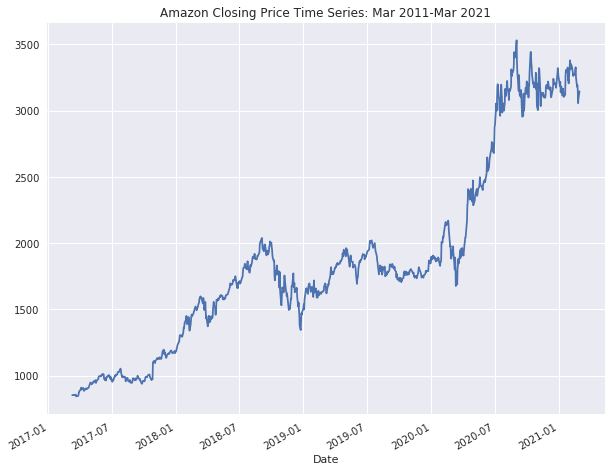

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
with plt.style.context('seaborn'):
    df.tail(1000)['Close'].plot(figsize=(10,8))
    plt.title('Amazon Closing Price Time Series: Mar 2011-Mar 2021')

In [7]:
# ====================================
# Validation Check
# DO NOT CHANGE THIS CELL
# ====================================
assert type(df) == pd.DataFrame
vcf_01 = [df.index.astype(str).min(), df.index.astype(str).max()]
with open('results/vcf_ml_regression_01.txt', 'w') as f:
    for item in vcf_01:
        f.write("%s\n" % item)

# 2. Feature Engineering

Without loss of generality, we take into account two financial indicators that will be then used inside our machine learning model: simple returns and a proxy for volatility.

### 2.1 Daily Returns

Daily returns are defined as a percentage change in the observed price. In mathematical terms, they are defined as follows:
$$ R_t = \frac{P_{t}}{P_{t-1}}-1 $$
If you have already taken the `Data Wrangling with Pandas` course, available in our content library, this concept should be familiar to you. If not, do not worry: it is sufficient to know that daily returns are used to better evaluate any investment, compared to a simple difference in price. Below you find a method that basically computes simple returns.

In [8]:
def daily_change(row): 
    return row.pct_change()

Note that daily returns can be alternatively computed using the pandas `.shift()` method, and this is preferred from a practical point of view, since financial returns are typically computed as log-returns. Mathematically, this translates as follows:

$$ log(R_t) = \log(P_{t}) - log(P_{t-1}) $$

We use `NumPy` to compute the logarithm of the quantity above. We therefore  `import numpy as np` and then use the `np.log()` method on the daily observed price. This has been done for you.

In [9]:
import numpy as np
def daily_log_change_shift(row):
    return np.log(row) - np.log(row.shift(1)) - 1

You are asked to compute both the simple and the log returns.

**Step 1**: Compute the simple returns using the given method `daily_change`. Store the results into a new column called `daily_returns` inside the dataframe `df`. This has been done for you.

In [10]:
df['daily_returns'] = df[['Close']].apply(lambda x: daily_change(x))

#### Challenge
**Step 2**: Compute the log returns.

Compute the log returns by applying the `daily_log_change_shift` method on the `df[['Close']]` columns, and then store the result into a new columns called `log_daily_returns` inside the dataframe `df`.

In [11]:
# Challenge
df['log_daily_returns'] = daily_log_change_shift(df[['Close']]) # this must be filled by student

In [12]:
# ====================================
# Validation Check
# DO NOT CHANGE THIS CELL
# ====================================
vcf_02 = [list(df)[-1], df.shape[1]]
with open('results/vcf_ml_regression_02.txt', 'w') as f:
    for item in vcf_02:
        f.write("%s\n" % item)

### 2.2 Volatility Index

Typically, a stock price is affected by rumors and news related to a stock. Such kind of actions directly affect the price of the underlying asset, inducing a certain level of interest in that particular company. This *interest* can be more formally translated into the concept of volatility. Please note that there exists a more formal definition of such a financial indicator. For this lab, we are going to use a proxy that is typically used by practitioners: the scaled daily range. This is nothing more than the difference between the maximum and minimum value observed in a particular trading session ,scaled by the observed closing price. This is done for you below here.

In [13]:
df['volatility_index'] = (df['High'] - df['Low']) / df['Close'] * 100.0

Let us inspect the first five rows of the enriched dataframe.

In [14]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,daily_returns,log_daily_returns,volatility_index
Date,,,,,,,,,
2011-03-01,173.960007,168.669998,173.529999,169.440002,5847100,169.440002,NaN,NaN,3.122054
2011-03-02,173.300003,168.350006,169.089996,172.020004,5185700,172.020004,0.015227,-0.984888,2.877571
2011-03-03,174.460007,172.050003,173.710007,172.789993,4138200,172.789993,0.004476,-0.995534,1.394759
2011-03-04,172.750000,169.509995,172.619995,171.669998,4924300,171.669998,-0.006482,-1.006503,1.887345
2011-03-07,172.089996,166.240005,171.919998,169.080002,5932900,169.080002,-0.015087,-1.015202,3.459895


We can also investigate the structure of each single feature using the `info` method.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2011-03-01 to 2021-03-01
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   High               2517 non-null   float64
 1   Low                2517 non-null   float64
 2   Open               2517 non-null   float64
 3   Close              2517 non-null   float64
 4   Volume             2517 non-null   int64  
 5   Adj Close          2517 non-null   float64
 6   daily_returns      2516 non-null   float64
 7   log_daily_returns  2516 non-null   float64
 8   volatility_index   2517 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 196.6 KB


We can see that the columns `daily_returns` and `log_daily_returns` have a missing value: this is reasonable, since technically speaking we can't compute the returns for the first observation. So we have two strategies:
1. drop the whole row where we observed a null value; or
2. impute the null value.

In this alb we are going to impute the null values using the multivariate technique `IterativeImputer`: please check the `Building a MAchine Learning pipeline with scikit-learn: part 01` course for more details.


We make the necessary imports: this is done for you

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#### Challenge

You are asked to perform the required imputation. To do so, you have to
 1. Initialize an `IterativeImputer`, and then 
 2. Transform the original data `df` using the Iterative Imputer.
 3. You then need to store the imputed data into the variable `imputed_data_df`
 
**Hint**: To store the imputed data into a `pandas.DataFrame`, you might find useful the following instruction: `pd.DataFrame(new_object, columns=list(df))`, where `new_object` is the results of point 2.

In [17]:
# Challenge
# this must be filled by student
# 1. Initialize an `IterativeImputer`, and then 
it = IterativeImputer()

In [18]:
# 2. Transform the original data `df` using the Iterative Imputer.
pd.DataFrame(it.fit_transform(df))

,0,1,2,3,4,5,6,7,8
0,173.960007,168.669998,173.529999,169.440002,5847100.0,169.440002,0.001208,-0.999202,3.122054
1,173.300003,168.350006,169.089996,172.020004,5185700.0,172.020004,0.015227,-0.984888,2.877571
2,174.460007,172.050003,173.710007,172.789993,4138200.0,172.789993,0.004476,-0.995534,1.394759
3,172.750000,169.509995,172.619995,171.669998,4924300.0,171.669998,-0.006482,-1.006503,1.887345
4,172.089996,166.240005,171.919998,169.080002,5932900.0,169.080002,-0.015087,-1.015202,3.459895
...,...,...,...,...,...,...,...,...,...
2512,3204.729980,3093.600098,3127.030029,3194.500000,4677200.0,3194.500000,0.004326,-0.995683,3.478788
2513,3171.229980,3125.379883,3166.750000,3159.530029,3011300.0,3159.530029,-0.010947,-1.011007,1.451168
2514,3178.260010,3047.760010,3136.739990,3057.159912,4533800.0,3057.159912,-0.032400,-1.032937,4.268668
2515,3122.439941,3036.699951,3095.199951,3092.929932,4275900.0,3092.929932,0.011700,-0.988368,2.772128


In [19]:
# 3. You then need to store the imputed data into the variable `imputed_data_df`
imputed_data_df = pd.DataFrame(it.fit_transform(df), index=df.index, columns=df.columns)

We know print the first five rows of the `imputed_data_df` object

In [20]:
imputed_data_df.head()

,High,Low,Open,Close,Volume,Adj Close,daily_returns,log_daily_returns,volatility_index
Date,,,,,,,,,
2011-03-01,173.960007,168.669998,173.529999,169.440002,5847100.0,169.440002,0.001208,-0.999202,3.122054
2011-03-02,173.300003,168.350006,169.089996,172.020004,5185700.0,172.020004,0.015227,-0.984888,2.877571
2011-03-03,174.460007,172.050003,173.710007,172.789993,4138200.0,172.789993,0.004476,-0.995534,1.394759
2011-03-04,172.750000,169.509995,172.619995,171.669998,4924300.0,171.669998,-0.006482,-1.006503,1.887345
2011-03-07,172.089996,166.240005,171.919998,169.080002,5932900.0,169.080002,-0.015087,-1.015202,3.459895


In [21]:
# ====================================
# Validation Check
# DO NOT CHANGE THIS CELL
# ====================================
vcf_03 =  [round(imputed_data_df.iloc[0,6], 4), round(imputed_data_df.iloc[0,7], 4)]
with open('results/vcf_ml_regression_03.txt', 'w') as f:
    for item in vcf_03:
        f.write("%s\n" % item)

# 3. Dataset Creation

Once we have performed some feature engineering, we are now ready to perform the so-called dataset creation phase. Here we are going to perform the necessary preprocessing that is needed before ingesting the data into a machine learning model.

### 3.1 Scaling Data

It is pretty clear that the features inside our dataframe do not share the same scale. Take, for instance, the `Volume` one: well, that is expressed in millions, whereas the `Adj Close` is expressed in hundreds. And, unfortunately, the remaining ones are expressed with very small numbers. 

This implies that we need to perform a sort of scaling of the data before ingesting it inside the model. To do so, we use the `StandardScaler` from the `sklearn.preprocessing` submodule. If you are not very familiar with the Standard Scaler, I strongly encourage you to watch the course `Building a Machine Learning pipeline with scikit-learn: part 01` available in our content library. 

The necessary import has been done for you in the next cell.


In [22]:
from sklearn.preprocessing import StandardScaler

We define a new variable called `X_unscaled` that contains the unscaled features from the `imputed_data_df` dataframe. This can be easily obtained by dropping both `Adj Close` and `Close` variables, since they are related to our target variable. This has been done for you below here:

In [23]:
X_unscaled = imputed_data_df.drop(['Adj Close', 'Close'], axis=1)

### Challenge
You are asked to perform the required scaling. To do so, you have to
 1. Initialize a `StandardScaler`; and then 
 2. Transform the `X_unscaled` using the StandardScaler.
 3. You then need to store the imputed data into the variable `X_scaled`.
 
**Hint**: To store the imputed data into a `pandas.DataFrame`, you might find useful the following instruction: `pd.DataFrame(new_object, columns=list(X_unscaled))`, where `new_object` is the results of point 2.

In [24]:
# Challenge
# this must be filled by student
#  1. Initialize a `StandardScaler`; and then 
scaler = StandardScaler()

In [25]:
#  2. Transform the `X_unscaled` using the StandardScaler.
scaler.fit_transform(X_unscaled)

array([[-0.9316245 , -0.93558779, -0.93088067, ..., -0.00754562,
        -0.0183518 ,  0.69444005],
       [-0.93237863, -0.93596266, -0.936012  , ...,  0.69774663,
         0.70460392,  0.50099406],
       [-0.93105319, -0.93162808, -0.93067264, ...,  0.15686457,
         0.16693131, -0.6722708 ],
       ...,
       [ 2.50113463,  2.43729439,  2.49370986, ..., -1.69848361,
        -1.72215226,  1.60169046],
       [ 2.43735376,  2.42433742,  2.44570191, ...,  0.52033361,
         0.52887367,  0.41756371],
       [ 2.46834162,  2.4961393 ,  2.48348178, ...,  0.79721921,
         0.80286613, -0.47889498]])

In [26]:
#  3. You then need to store the imputed data into the variable `X_scaled`.
X_scaled = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled))

In [27]:
# ====================================
# Validation Check
# DO NOT CHANGE THIS CELL
# ====================================
vcf_04 =  [round(X_scaled.iloc[0,1], 4)]
with open('results/vcf_ml_regression_04.txt', 'w') as f:
    for item in vcf_04:
        f.write("%s\n" % item)

We can now print the first five rows of the `X_scaled` dataframe.

In [28]:
X_scaled.head()

,High,Low,Open,Volume,daily_returns,log_daily_returns,volatility_index
0,-0.931625,-0.935588,-0.930881,0.672504,-0.007546,-0.018352,0.694440
1,-0.932379,-0.935963,-0.936012,0.390834,0.697747,0.704604,0.500994
2,-0.931053,-0.931628,-0.930673,-0.055266,0.156865,0.166931,-0.672271
3,-0.933007,-0.934604,-0.931932,0.279511,-0.394458,-0.387075,-0.282515
4,-0.933761,-0.938435,-0.932741,0.709044,-0.827407,-0.826432,0.961755


Now, let us set the variable `y` as the pandas Series related to the `Adj Close` columns, which is in our case the target variable. This has been done for you in the next cell.

In [29]:
y = imputed_data_df['Adj Close']

We finally need to split the data into two different sets: training and test. The two sets are made independent of each other. The training is used to learn specific patterns in the data, whereas the test is then used to test the prediction power of the trained model on new data. Note that we are going to take the last 10% observations as a test set. This step has been done for you in the cell below here:

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.1, shuffle=False)

# 4. Model Fitting

## 4.1 Linear Regression

We are now ready to fit a regression model to predict the closing price of the amazon stock. We need to import the `LinearRegression` class from the sklearn submodule `linear_models`.

In [31]:
from sklearn.linear_model import LinearRegression

#### Challenge
We are now ready to fit a linear regression model on our data using scikit-learn. A `LinearRegression` is technically an estimator, which means that it is characterized by two methods: a `fit` and a `predict`. You are asked to:
1. Initialize a `LinerarRegression` model with the following hyperparameters: `normalize=True`. If this is set to `True`, than all the features will be normalized before regression by subtracting the mean and dividing by the L2-norm. Store this into the variable `lr`.
2. Fit the instantiated model using `X_train` and `y_train`.

In [32]:
# Challenge
# this must be filled by student
reg_all = LinearRegression(normalize=True)
lr = reg_all.fit(X_train, y_train)

In [33]:
# ====================================
# Validation Check
# DO NOT CHANGE THIS CELL
# ====================================
with open('results/vcf_ml_regression_05.txt', 'w') as f:
    f.write("%s\n" % str(lr))

We can visualize the estimated $\beta$'s coefficients with the `lr`'s attribute `coef_`. For a better visualization, I have stored the results into a pandas dataframe. This is done for you in the next cell:

In [34]:
est_coef_df = pd.DataFrame([elem for elem in lr.coef_], columns = ['estimated_beta'])
est_coef_df.index = list(X_train)
est_coef_df

,estimated_beta
High,713.276152
Low,615.110155
Open,-463.566163
Volume,0.041989
daily_returns,-18.708855
log_daily_returns,20.721418
volatility_index,0.205709


We can easily compute the $R^2$ on the test set by applying the `score` method on `lr`. We pass the `X_test` and `y_test` to that function. This is done for you here below:

In [35]:
lr.score(X_test, y_test)

0.9978379195048753

That is really impressive. However, the $R^2$ is a proxy measure for evaluation: indeed, the objective function inside a linear regression model is the Mean Squared Error (MSE), and we aim to estimate the $\beta$'s that minimize it. Let us compute the RMSE for the test set: this is going to be very useful to understand the model performance later.

#### Challenge
We are now ready to check the model performance on unseen data: this means that we are going to use the test set we have kept independent from the training set, and try to predict the `Adj Close` for each single observation in the test set. Since we do know the true target, then we are going to compute the model performance on the test set.

You are asked to:
1. predict the target variable for each single observation in `X_test`: this is done by applying the `.predict` method on the `lr`. Store the results into the variable `y_pred_lr`;
2. you are going to compute the prediction error using the RMSE. To do so, we are going to use the `mean_squared_error` function imported from the `.metrics` submodule. This import has been done for you. You are, however, asked to compute it. A prefilled cell is waiting for you here below.

In [36]:
# Step 1
y_pred_lr = reg_all.predict(X_test) # this must be filled by student

In [37]:
# Step 2
from sklearn.metrics import mean_squared_error
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr)) # this must be filled by student
print(f"RMSE Linear Regression: {round(rmse_lr, 4)}")

RMSE Linear Regression: 22.0293


In [38]:
# ====================================
# Validation Check
# DO NOT CHANGE THIS CELL
# ====================================
with open('results/vcf_ml_regression_06.txt', 'w') as f:
    f.write("%s\n" % str(round(rmse_lr,4)))

We can visualize the actual versus the predicted values in a plot: this is done for you in the next two cells. At first, we are going to store the predicted values inside a dataframe called `test_pred_df_lr`. Then, we compare the actual versus predicted ones by plotting them. We should expect an identical behaviour from the two series.

In [39]:
test_pred_df_lr = pd.DataFrame()
test_pred_df_lr['Date'] = df.iloc[-len(X_test):].index
test_pred_df_lr['y_pred_LR'] = y_pred_lr
test_pred_df_lr.set_index('Date', inplace=True)

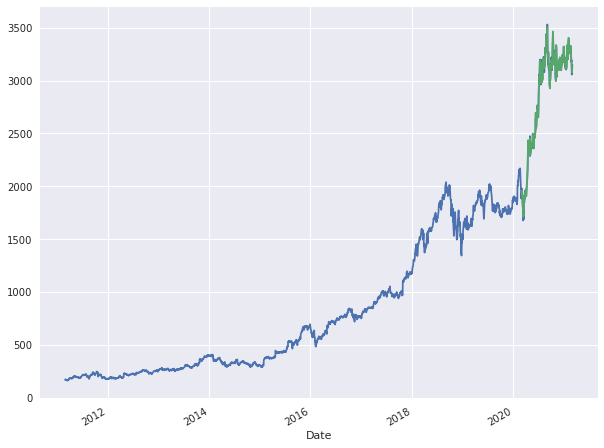

In [40]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn'):
    df.tail(imputed_data_df.shape[0])['Close'].plot(figsize=(10,8))
    test_pred_df_lr['y_pred_LR'].plot(figsize=(10,8))

## 4.2 Ridge Regression

A possibility here is to add some bias inside the model to control model performances and overfitting. To accomplish this, we can think of using a Ridge model. A Ridge model is a member of the linear models, and it extends somehow the Linear Regression by adding some bias to the model. In this scenario, the estimated values might not be the ones with minimum variance. This is because, technically speaking, Ridge regression regularizes the linear regression by imposing a penalty on the size of coefficients, shrinking toward zero (and toward each other) the coefficients.

In [41]:
from sklearn.linear_model import Ridge

#### Challenge
You are asked to:
1. initialize a Ridge model by setting the following hyperparameters: `normalize=True, alpha=0.5, random_state=42, max_iter=1000`. The parameter `alpha` controls the regularization effect. Store this into the variable `ridge_reg`;
2. fit the `ridge_reg` on `X_train` and `y_train`;
3. predict the target values on `X_test` by applying the `predict` method on `ridge_reg`. Store the results into the variable `y_pred_ridge`;
4. compute the RMSE on the predicted values by using the `mean_squared_error` method from the `sklearn.metrics` submodule. Wrap the whole function inside a `np.sqrt` method to take the root of the mean squared error. Hint: the `mean_squared_function` requires two arguments: `y_pred_ridge` and `y_test`.

In [42]:
# Challenge
# this must be filled by student
ridge_reg = Ridge(normalize=True, alpha=0.5, random_state=42, max_iter=1000)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge)) # this must be filled by student
print(f"RMSE Ridge Regression: {round(rmse_ridge, 4)}")

RMSE Ridge Regression: 322.96


In [44]:
# ====================================
# Validation Check
# DO NOT CHANGE THIS CELL
# ====================================
vcf_07 =  [str(ridge_reg), round(rmse_ridge, 4)]
with open('results/vcf_ml_regression_07.txt', 'w') as f:
    for item in vcf_07:
        f.write("%s\n" % item)

This is pretty high, right? It seems we are bringing too much variability inside the model. Let us check with the `score` method how well we are performing on the test set.

In [45]:
ridge_reg.score(X_test, y_test)

0.535305651745854

Well, that is not what we wish to have at the end of the day. The $R^2$ is pretty low compared to the standard linear regression. We can plot the results as we did for the linear regression case. This is done for you below here:

In [46]:
test_pred_df_ridge = pd.DataFrame()
test_pred_df_ridge['Date'] = df.iloc[-len(X_test):].index
test_pred_df_ridge['y_pred_Ridge'] = y_pred_ridge
test_pred_df_ridge.set_index('Date', inplace=True)

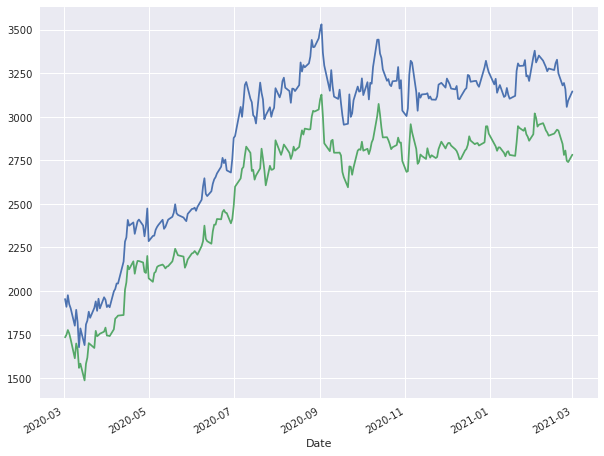

In [47]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn'):
    df.tail(test_pred_df_ridge.shape[0])['Close'].plot(figsize=(10,8))
    test_pred_df_ridge['y_pred_Ridge'].plot(figsize=(10,8))

## 4.3 Model Tuning: Grid Search Cross validation

But wait: the `Ridge` model is characterized by different hyperparameters that we have assumed to be fixed - take, as an example, the `alpha=0.5` we used before. Those parameters, however, have to be estimated somehow, and a strategy to accomplish this is by means of grid search cross validation. Put in simpler terms, we are going to define a grid of possible values for our hyperparameters, and then we estimate different models with different combinations of those hyperparameters using cross-validation. If this terminology is not familiar to you, I strongly encourage you to watch the course `Building a Machine Learning pipeline with scikit-learn: part 02`.

To perform grid search cross-validation in scikit-learn, we use the `GridSearchCV` method from the `model_selection` submodule. In this lab, we are going to explore a small grid, but obviously you can play with it, and check how the model performances vary using different sets of hyperparameters. Here, I have definied a grid for the parameter alpha, which I assume it might take five possible values: `[0.005, 0.1, 0.5, 1, 5]`. This is done for you below here.

In [48]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'alpha': [0.005, 0.1, 0.5, 1, 5]
}

We then:
1. initialize a `GridSearchCV` object by passing: the `ridge_reg` estimator, the params_rid set to be equal to `grid_params`, and `cv` equal to 5. Store this into the variable `cv`. <br>
2. we fit the `cv` with `X_train` and `y_train`.

This has been done again for you below here.

In [49]:
cv = GridSearchCV(ridge_reg, grid_params, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=0.5, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, random_state=42,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.005, 0.1, 0.5, 1, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Remember that a grid search cross-validation looks for the best model according to the specified grid. Hence, in the back-end, it fits several models but it returns just one: the best one. We can access this using the attribute `best_estimator_` as well as we can inspect the best hyperparameter using the attribute `best_params_`.

#### Challenge
You are asked to extract both the best models and the corresponding hyperparameter, as well as to compute the RMSE on the predicted values coming from the grid search cross-validation's best model. <br>
To do so,
1. Get the best model: you just need to access to the attribute `best_estimator_` of the object `cv`. Store this into the variable `best_model`. <br>
2. Get the best hyperparameter asssociated to the best model: you just need to access to the attribute `best_params_` of the object `cv`. Store this into the variable `best_params`. <br>
3. Predict the target values on `X_test` by applying the `predict` method on the `best_model` you created in step 4. Store the results into the variable `y_pred_ridge_cv`. <br>
5. Compute the RMSE on the predicted values by using the `mean_squared_error` method from the `sklearn.metrics` submodule. Wrap the whole function inside a `np.sqrt` method to take the root of the mean squared error. 

**Hint**: the `mean_squared_function` requires two arguments: `y_pred_ridge_cv` and `y_test`. <br>

In [50]:
# Challenge
# this must be filled by student
best_model = cv.best_estimator_

In [51]:
best_params = cv.best_params_

In [52]:
y_pred_ridge_cv = best_model.predict(X_test)

In [53]:
rmse_ridge_cv = np.sqrt(mean_squared_error(y_test, y_pred_ridge_cv))

In [54]:
print(f"Best Ridge RMSE: {round(rmse_ridge_cv,4)}")

Best Ridge RMSE: 30.5063


In [55]:
# ====================================
# Validation Check
# DO NOT CHANGE THIS CELL
# ====================================
vcf_08 =  [best_params['alpha'], round(rmse_ridge_cv,4)]
with open('results/vcf_ml_regression_08.txt', 'w') as f:
    for item in vcf_08:
        f.write("%s\n" % item)

Let us inspect the $R^2$ for the best model:

In [56]:
best_model.score(X_train, y_train)

0.9998227626094259

Performances have really improved with grid search cross-validation. We can plot the predicted versus actual values to get a qualitative understanding of our model's performances.

In [57]:
test_pred_df_ridge_cv = pd.DataFrame()
test_pred_df_ridge_cv['Date'] = df.iloc[-len(X_test):].index
test_pred_df_ridge_cv['y_pred_Ridge_best'] = y_pred_ridge_cv
test_pred_df_ridge_cv.set_index('Date', inplace=True)

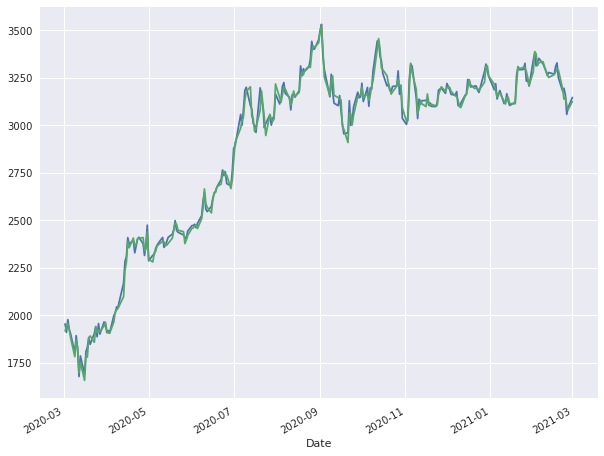

In [58]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn'):
    df.tail(test_pred_df_ridge_cv.shape[0])['Close'].plot(figsize=(10,8))
    test_pred_df_ridge_cv['y_pred_Ridge_best'].plot(figsize=(10,8))

That is pretty good, right? Let's compare the predicted values from both the best ridge model and the linear regression model with the actual values for a restricted time-window - say from Jan 01, 2021 to Mar 01, 2021. Ridge looks smoother somehow, compared to the regression model. Please, run the cell below to inspect this by yourself.

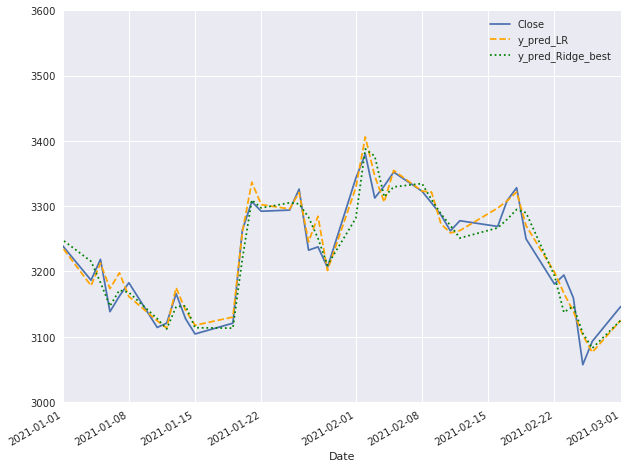

In [59]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn'):
    df.tail(test_pred_df_ridge_cv.shape[0])['Close'].plot(figsize=(10,8))
    test_pred_df_lr['y_pred_LR'].plot(figsize=(10,8), color='orange', linestyle='--')
    test_pred_df_ridge_cv['y_pred_Ridge_best'].plot(figsize=(10,8), color='green', linestyle=':')
    plt.xlim('2021-01-01', '2021-03-01')
    plt.ylim(3000, 3600)
    plt.legend()

## END